## Data cleaning

### Ideas

How to define weight loss?
- rate of change
- first and last entered value
- for many entries, moving average?

Remove ID from stats.txt if not found in weights.txt?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('weights.txt', delimiter='\t')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365864 entries, 0 to 365863
Data columns (total 3 columns):
ID        365864 non-null int64
Date      365864 non-null object
Weight    365864 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.4+ MB


In [58]:
df.head(10)

,ID,Date,Weight
0,1,2018-4-28,94.34733
1,1,2018-5-4,93.89374
2,1,2018-5-9,94.80093
3,2,2018-1-23,100.00000
4,2,2018-2-6,98.50000
5,3,2019-2-7,81.00000
6,3,2019-2-8,80.50000
7,4,2018-1-21,100.00000
8,4,2018-1-8,100.00000
9,5,2017-12-18,50.10000


### Convert date to datetime object

In [59]:
# Change date strings into datetime objects

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [60]:
# number of users with missing dates

df[df['Date'].isnull()]['ID'].nunique()

825

In [66]:
# Remove all rows that have empty date entries since there is no way of knowing if the user gained or lost weight
# Entries are not ordered chronologically

df = df[df['Date'].notnull()]

### Take a closer look at weight entries
- especially the extremes

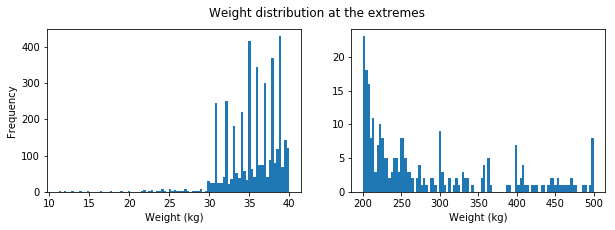

In [67]:
plt.figure(1, figsize=(10,3))
plt.suptitle('Weight distribution at the extremes')
plt.subplot(121)
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.hist(df[(df['Weight']>0) & (df['Weight']<40)]['Weight'], bins=90)

plt.subplot(122)
plt.xlabel('Weight (kg)')
plt.hist(df[df['Weight']>200]['Weight'], bins=100)
plt.show()

In [68]:
# Basic web search indicates that the highest end of this weight distribution is still plausible
# Will not categorize data as inaccurate nor assume error for weight > 200 kg

print('# users, weight < 30 kg:', df[(df['Weight']>0) & (df['Weight']<30)]['Weight'].count())
print('# users, weight > 200 kg:', df[df['Weight']>200]['Weight'].count())
print('# users, no entry, weight=0:', df[df['Weight']==0]['Weight'].count())

# users, weight < 30 kg: 78
# users, weight > 200 kg: 266
# users, no entry, weight=0: 13687


In [69]:
# Remove weights with zero as entry

df = df[df['Weight'] != 0]

In [72]:
# Remove weights < 30 kg (based on dropoff in distribution around 30 kg)

df = df[df['Weight'] >= 30]

In [75]:
# Sort by ID, then Date

df = df.sort_values(['ID', 'Date'], ascending=[True, True])

In [77]:
df.to_pickle('df_weights_190502.pkl')